In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout
from keras.datasets import cifar10
import tensorflow.keras.utils
from keras.regularizers import l2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()

In [ ]:
ytrain = tensorflow.keras.utils.to_categorical(ytrain, 10)
ytest = tensorflow.keras.utils.to_categorical(ytest, 10)

In [ ]:
ytrain.shape

(50000, 10)

In [ ]:
ytest.shape

(10000, 10)

In [ ]:
model = Sequential()

model.add(Conv2D(64, kernel_size = (3,3),
                 input_shape = (xtrain.shape[1:]),
                 padding = "same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = (3,3)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(128, (3,3),
                 padding = "same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(512, kernel_regularizer = l2(0.01)))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

model.summary()




Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_90 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 activation_95 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 batch_normalization_4 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_91 (Conv2D)          (None, 30, 30, 64)        36928     
                                                                 
 activation_96 (Activation)  (None, 30, 30, 64)        0         
                                                                 
 batch_normalization_5 (Bat  (None, 30, 30, 64)        256       
 chNormalization)                                     

In [ ]:
model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

xtrain = xtrain.astype("float32")
xtest = xtest.astype("float32")

xtrain = xtrain/225
xtest = xtest/225

In [ ]:
history = model.fit(xtrain, ytrain, batch_size = 32, epochs = 50, validation_data = (xtest, ytest),shuffle  =True)

Epoch 1/50
1563/1563 [==============================] - 22s 12ms/step - loss: 4.2449 - accuracy: 0.3961 - val_loss: 2.7519 - val_accuracy: 0.4622
Epoch 2/50
1563/1563 [==============================] - 19s 12ms/step - loss: 2.4860 - accuracy: 0.5780 - val_loss: 2.4398 - val_accuracy: 0.5688
Epoch 3/50
1563/1563 [==============================] - 19s 12ms/step - loss: 2.3190 - accuracy: 0.6325 - val_loss: 2.2424 - val_accuracy: 0.6675
Epoch 4/50
1563/1563 [==============================] - 19s 12ms/step - loss: 2.2025 - accuracy: 0.6610 - val_loss: 2.1739 - val_accuracy: 0.6657
Epoch 5/50
1563/1563 [==============================] - 19s 12ms/step - loss: 2.0791 - accuracy: 0.6822 - val_loss: 1.8849 - val_accuracy: 0.7189
Epoch 6/50
1563/1563 [==============================] - 18s 12ms/step - loss: 1.9602 - accuracy: 0.7015 - val_loss: 1.8890 - val_accuracy: 0.7153
Epoch 7/50
1563/1563 [==============================] - 19s 12ms/step - loss: 1.8799 - accuracy: 0.7137 - val_loss: 1.9856 -

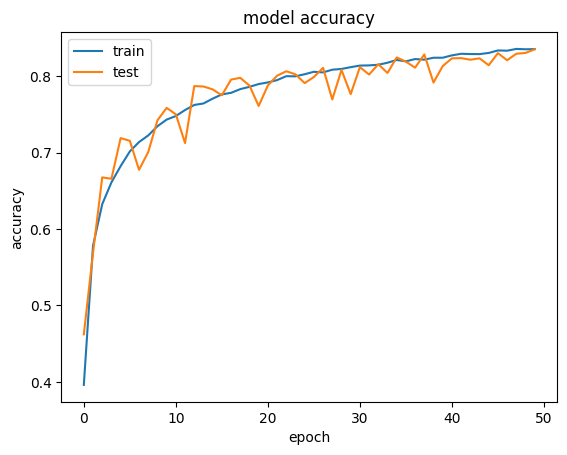

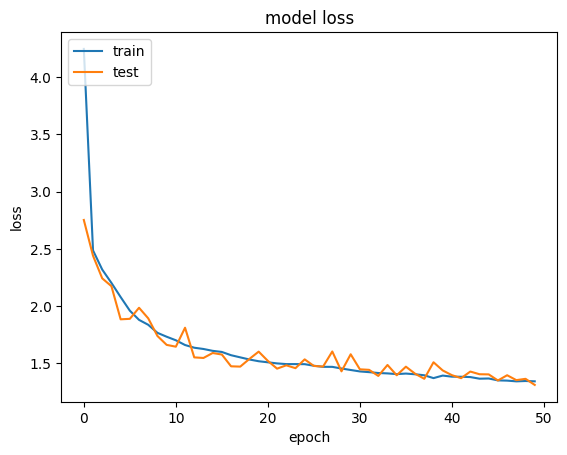

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()